<h1><center> Business Understanding - Data Understanding phases Notebook  </center></h1>

### Import Libraries <a class="anchor" id="chapterLibrary"></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import pearsonr
import itertools
import scipy.stats as ss
from scipy.stats import pointbiserialr
from scipy import stats
from scipy.stats import spearmanr
from dython.nominal import associations
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

### CRISP-DM Methodology <a class="anchor" id="chapterCRISPM"></a>

### Chapter 1. Business understanding  <a class="anchor" id="chapter1"></a>

##### - Assignment Overview (Context,Problem,Goal) 

##### - Main Research Question:

What machine learning techniques and algorithms can be used to identify which telco customers are at risk of churning and what factors contribute to this churn risk?

##### - Business question:

How to identify at-risk Telco customers for potential churn so that they can be targeted?

#### Data mining goals translation: 

Data Analytics = Descriptive Analytics (EDA to generate insights) and Predictive Analytics (EDA to generate patterns that can be used in an AI ruled based system - Building an AI machine learning model)

### Chapter 2. Data understanding  <a class="anchor" id="chapter2"></a>

### 2.1 Data Collection

### 2.1.1 Data Requirements

Create a data model to help understand the structure (star/snowflake schema or ERD)

### 2.1.2 Data Insertion

In [2]:
df = pd.read_csv(r'../telco_customers.xls')

### Functions Definition <a class="anchor" id="chapterFunction"></a>

In [3]:
def volumetric_analysis(df):
 print("Data Types:\n" + str(df.dtypes))
 print("\nRows and Columns: " + str(df.shape))
 print("\nColumns Names:\n" + str(df.columns))
 print("\nNull Values:\n" + str(df.apply(lambda x: sum(x.isnull()) / len(df))))
 print("\nNull Values:\n" + str(df.apply(lambda x: sum(x.isnull()) )))
 print("\nDuplicate Values:\n" + str(df[df.duplicated()].shape))

In [4]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    sns.kdeplot(df[df['Churn'] == 'Yes'][feature], color = 'red', label= 'Churn: Yes')
    sns.kdeplot(df[df['Churn'] == 'No'][feature], color = 'blue', label= 'Churn: No')
    plt.title("{} KDE".format(feature))
    plt.legend()
    plt.show()

### 2.2 Data Description

In [52]:
volumetric_analysis(df)

Data Types:
CustomerID           object
Gender               object
SeniorCitizen        object
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Rows and Columns: (7043, 21)

Columns Names:
Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalC

In [71]:
fig = px.bar(x=[df["Churn"].value_counts(normalize=True).index[0],df["Churn"].value_counts(normalize=True).index[1]], y = [round(df["Churn"].value_counts(normalize=True)[0]* 100),round(df["Churn"].value_counts(normalize=True)[1]* 100)], text_auto=True, color = [df["Churn"].value_counts(normalize=True).index[0],df["Churn"].value_counts(normalize=True).index[1]], color_discrete_sequence=[px.colors.qualitative.Set3[4],px.colors.qualitative.Set3[5]], height=400, width = 600, title=' % Distribution Churn')
fig.update_traces(textfont_size=12, textposition="inside",textfont_color='black', texttemplate = '%{y:.0f}%')
fig.update_layout(yaxis_title = 'Percentage',xaxis_title = 'Churn')
fig.show()

### 2.3 Data Exploration (EDA)

####  I. Descriptive Analytics

#### 2.3.1 Data Cleaning

In [5]:
df.rename(columns = lambda x: "".join([w[0].upper() + w[1:] for w in x.split()]), inplace = True)

excluded = ['Tenure','MonthlyCharges','TotalCharges']
string_columns = [ col for col in df.columns if col not in excluded]
df[string_columns] = df[string_columns].astype(str)

df["SeniorCitizen"] = df["SeniorCitizen"].str.replace("0","No")
df["SeniorCitizen"] = df["SeniorCitizen"].str.replace("1","Yes")

# Replace empty total charges with 0 for customers with 0 month tenure period
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

del df["CustomerID"]

In [ ]:
copy_df = df.copy()
copy_df['TotalCharges']=sorted(copy_df['TotalCharges'])
Q1, Q3= np.percentile(copy_df['TotalCharges'],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 
out= copy_df[(copy_df['TotalCharges']<lower_bound) | (copy_df['TotalCharges']>upper_bound)]
out.shape[0]

In [ ]:
copy_df = df.copy()
copy_df['MonthlyCharges']=sorted(copy_df ['MonthlyCharges'])
Q1, Q3= np.percentile(copy_df['MonthlyCharges'],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 
out= copy_df[(copy_df['MonthlyCharges']<lower_bound) | (copy_df['MonthlyCharges']>upper_bound)]
out.shape[0]

In [ ]:
copy_df = df.copy()
copy_df['Tenure']=sorted(copy_df['Tenure'])
Q1, Q3= np.percentile(copy_df['Tenure'],[25,75])
IQR = Q3 - Q1
lower_bound = Q1 -(1.5 * IQR) 
upper_bound = Q3 +(1.5 * IQR) 
out= copy_df[(copy_df['Tenure']<lower_bound) | (copy_df['Tenure']>upper_bound)]
out.shape[0]

In [ ]:
mean = np.mean(df['MonthlyCharges'])
std = np.std(df['MonthlyCharges'])
df["charges_z_score"] = (df['MonthlyCharges'] - mean)/std

# create empty list
outlier_indexes = []

# add index numbers of outliers to list
outlier_indexes.extend(df.index[df['charges_z_score']>3].tolist())
outlier_indexes.extend(df.index[df['charges_z_score']<-3].tolist())

new_data = df.drop(df.index[outlier_indexes])

print(df.shape[0], new_data.shape[0])
print(df.shape[0]-new_data.shape[0])

In [ ]:
mean = np.mean(df['TotalCharges'])
std = np.std(df['TotalCharges'])
df["charges_z_score"] = (df['TotalCharges'] - mean)/std

# create empty list
outlier_indexes = []

# add index numbers of outliers to list
outlier_indexes.extend(df.index[df['charges_z_score']>3].tolist())
outlier_indexes.extend(df.index[df['charges_z_score']<-3].tolist())

new_data = df.drop(df.index[outlier_indexes])

print(df.shape[0], new_data.shape[0])
print(df.shape[0]-new_data.shape[0])

In [ ]:
mean = np.mean(df['Tenure'])
std = np.std(df['Tenure'])
df["charges_z_score"] = (df['Tenure'] - mean)/std

# create empty list
outlier_indexes = []

# add index numbers of outliers to list
outlier_indexes.extend(df.index[df['charges_z_score']>3].tolist())
outlier_indexes.extend(df.index[df['charges_z_score']<-3].tolist())

new_data = df.drop(df.index[outlier_indexes])

print(df.shape[0], new_data.shape[0])
print(df.shape[0]-new_data.shape[0])

#### 2.3.2 Univariate Analysis

In [5]:
df.describe() # a customer has stayed on average 2.5 years with the company; the amount charged on average to the customer is 64 dollars; the total amount charged on average is 2.279

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
fig = px.histogram(df,x= 'Tenure',height=400, width = 600, title = "Count of customers per Tenure", nbins = 140)
# Add a trace for the density line
fig.show() # most customers have been clients for 1 month, followed by 72 months (6 years)

In [7]:
fig = px.box(df,y ='Tenure',height=400, width = 600, title = "Boxplot Tenure")
fig.show()

In [8]:
fig = px.histogram(df,x= 'MonthlyCharges',height=400, width = 600, title = "Count of customers per MonthlyCharges", nbins = 50)
fig.show() # a big amount of customer have between 20-25 dollars charges per month. There are fewever customers who have more than 25 monthly charge per month 

In [9]:
fig = px.box(df,y ='MonthlyCharges',height=400, width = 600, title = "Boxplot MonthlyCharges")
fig.show()

In [10]:
fig = px.histogram(df,x= 'TotalCharges',height=400, width = 800, title = "Count of customers per TotalCharges",nbins=50)
fig.show() # most costumers have total charges between 0 - 2000. There are fewer customers having total amounts higher than 2000.

In [11]:
fig = px.box(df,y ='TotalCharges',height=400, width = 600, title = "Boxplot TotalCharges")
fig.show()

In [70]:
excluded = ['tenure','MonthlyCharges','TotalCharges']
string_columns = [ col for col in df.columns if col not in excluded]
table_cat = pd.DataFrame(df, columns = [string_columns])
table_cat = table_cat.rename(index={table_cat.index[0]: 'mode'})
table_cat = table_cat[:1]
for i in df[string_columns]:
   table_cat.iloc[0,table_cat.columns.get_loc(i)] = df[i].mode()[0]

table_cat # most customers are male, young, single, no dependents, most have a phoneService, not multipleLines, a Fiber Optic InternetService, no OnlineSecurity, no OnlineBackup, No DeviceProtection, NoTechSupport, no StreamingTV, no StreamingMovies, a Month to Month contract, with PaperlessBilling, Electronic Check, and most of them did not churn

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
mode,0002-ORFBO,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [71]:
table_value = pd.DataFrame(df, columns = [string_columns])
table_value = table_value.drop('customerID', axis = 1, level = 0) 
table_value = table_value.rename(index={table_value.index[0]: 'Yes'})
table_value = table_value.rename(index={table_value.index[1]: 'No'})
table_value = table_value.rename(index={table_value.index[2]: 'Female'})
table_value = table_value.rename(index={table_value.index[3]: 'Male'})
table_value = table_value.rename(index={table_value.index[4]: 'No phone service'})
table_value = table_value.rename(index={table_value.index[5]: 'Fiber optic'})
table_value = table_value.rename(index={table_value.index[6]: 'DSL'})
table_value = table_value.rename(index={table_value.index[7]: 'No internet service'})
table_value = table_value.rename(index={table_value.index[8]: 'Month-to-month'})
table_value = table_value.rename(index={table_value.index[9]: 'Two year'})
table_value = table_value.rename(index={table_value.index[10]: 'One year'})
table_value = table_value.rename(index={table_value.index[11]: 'Electronic check'})
table_value = table_value.rename(index={table_value.index[12]: 'Mailed check'})
table_value = table_value.rename(index={table_value.index[13]: 'Bank transfer (automatic)'})
table_value = table_value.rename(index={table_value.index[14]: 'Credit card (automatic)'})
table_value = table_value[:15]
index_values = table_value.index.unique().tolist()
# fill in table
for i in df[string_columns]:
        counts = df[i].value_counts()
        for j in index_values:
            if j in counts.index:
                table_value.loc[j, i] = "{:.0%}".format(counts[j]/len(df[i]))
            else:
                table_value.loc[j, i] = '-'
table_value

# approx half of the customer are male and approx half female; only 16% are seniors; about half has a partner while the other half does not have; only 30% have children; 
# most of the them have a phoneservice; out of the 90% that do have phoneService, half of them have MultipleLines; most of the customers have InternetService (78% - more for FiberOptic)
# out of those 78% who have InternetService, mostly (50%) don't have OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
# most costumers have a month-to-month contract, followed by two-year and one-year
# most customers prefer paperlessbilling
# most customers prefer electronic check

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,customerID
Yes,-,16%,48%,30%,90%,42%,-,29%,34%,34%,29%,38%,39%,-,59%,-,27%,-
No,-,84%,52%,70%,10%,48%,22%,50%,44%,44%,49%,40%,40%,-,41%,-,73%,-
Female,50%,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Male,50%,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
No phone service,-,-,-,-,-,10%,-,-,-,-,-,-,-,-,-,-,-,-
Fiber optic,-,-,-,-,-,-,44%,-,-,-,-,-,-,-,-,-,-,-
DSL,-,-,-,-,-,-,34%,-,-,-,-,-,-,-,-,-,-,-
No internet service,-,-,-,-,-,-,-,22%,22%,22%,22%,22%,22%,-,-,-,-,-
Month-to-month,-,-,-,-,-,-,-,-,-,-,-,-,-,55%,-,-,-,-
Two year,-,-,-,-,-,-,-,-,-,-,-,-,-,24%,-,-,-,-


#### 2.3.3 Bivariate Analysis

In [16]:
main_servives = ["InternetService","PhoneService"]

counts_phoneService_percentage = ((df.loc[(df['PhoneService'] == "Yes")]).shape[0]/df.shape[0]) * 100
counts_InternetService_percentage = ((df.loc[(df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic") ]).shape[0]/df.shape[0]) * 100

data = {'Class': main_servives,'Yes': [counts_InternetService_percentage,counts_phoneService_percentage]}
dataframe = pd.DataFrame(data)

dataframe['No'] = 100 - dataframe['Yes']

fig = px.bar(dataframe, x='Class', y=['No', 'Yes'], height=400, width=500, color_discrete_sequence=[ px.colors.qualitative.Safe[0],px.colors.qualitative.T10[0] ],title="Percentage of customers per Service excluding Both")
fig.update_traces(textfont_size=12, textposition="inside",textfont_color='white', texttemplate = '%{y:.0f}%')
fig.show()

In [17]:
main_servives = ["InternetService","PhoneService","Both"]

counts_onlyphoneService_percentage = ((df.loc[(df['PhoneService'] == "Yes") & (df['InternetService'] == "No")]).shape[0]/df.shape[0]) * 100
counts_onlyInternetService_percentage = ((df.loc[(df['PhoneService'] == "No") & ((df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic"))]).shape[0]/df.shape[0]) * 100

counts_both_percentage = ((df.loc[(df['PhoneService'] == "Yes") & ((df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic"))]).shape[0]/df.shape[0]) * 100

data = {'Class': main_servives,'Percentage': [counts_onlyInternetService_percentage,counts_onlyphoneService_percentage,counts_both_percentage]}
dataframe = pd.DataFrame(data)

fig = px.bar(dataframe, x='Class', y='Percentage', height=400, width=600, color='Class', color_discrete_map = {'InternetService': px.colors.qualitative.Pastel1[1] , 'PhoneService': px.colors.qualitative.Set3[4] ,'Both': px.colors.qualitative.T10[0]},title="Percentage of Customers per Service including Both")
fig.update_traces(textfont_size=12, textposition="inside",textfont_color='white', texttemplate = '%{y:.0f}%')
fig.show()

In [25]:
main_servives = ["Fiber optic","DSL"]

internet_service_df =  df.loc[(df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic")]

counts_FiberOptic_percentage = ((internet_service_df.loc[(internet_service_df['InternetService'] == "Fiber optic")]).shape[0]/df.shape[0]) * 100
counts_DSL_percentage = ((internet_service_df.loc[(internet_service_df['InternetService'] == "DSL")]).shape[0]/df.shape[0]) * 100

data = {'Class': main_servives,'Yes': [counts_FiberOptic_percentage,counts_DSL_percentage]}
dataframe = pd.DataFrame(data)

fig = px.bar(dataframe, x='Class', y=['Yes'], height=400, width=500,title="Percentage of customers per InternetService Subtypes", color='Class', color_discrete_map = {'Fiber optic': px.colors.qualitative.T10[3] , 'DSL': px.colors.qualitative.Pastel1[0]})
fig.update_traces(textfont_size=12, textposition="inside",textfont_color='white', texttemplate = '%{y:.0f}%')
fig.show()

In [67]:
services = ['OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines']

# Count the number of occurrences of "Yes" for each service
counts = df[services].isin(['Yes']).sum()
my_df = pd.DataFrame({'count': counts})

percentages = [my_df.iloc[i][0]/df.shape[0] * 100 for i in range(len(services))]

# data = {'Class': services, 'Yes': [onlineSecurityPercentage,techSupportPercentage,deviceProtectionPercentage,onlineBackupPercentage,streamingTVPercentage, streamingMoviesPercentage,multipleLinesPercentage ]}
data = {'Class': services, 'Yes': percentages}
dataframe = pd.DataFrame(data)

fig = px.bar(dataframe, x="Class", y= "Yes", height=400, width=600,title="Percentage of customers per Extra services",color_discrete_sequence=[px.colors.qualitative.Set1[1]])
fig.update_traces(textfont_size=12, textposition="inside",textfont_color='white', texttemplate = '%{y:.0f}%')
fig.update_layout(
    xaxis={'categoryorder': 'total descending'}
)
fig.show()

In [182]:
services = ['InternetService','Both','PhoneService']

copy = df.loc[(df['PhoneService'] == "No") & ((df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic"))] #copy = df.loc[(df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic")] #df['InternetService'].replace(['DSL','Fiber optic'], 'Yes', inplace=True)
internet_service_value = copy["TotalCharges"].sum()
copy = df.loc[(df['PhoneService'] == "Yes") & ((df['InternetService'] == "DSL") | (df['InternetService'] == "Fiber optic"))]
both_value = copy["TotalCharges"].sum()
copy = df.loc[(df['PhoneService'] == "Yes") & (df['InternetService'] == "No")]
phone_service_value = copy["TotalCharges"].sum()

data = {'Class': services,'Yes': [internet_service_value,both_value,phone_service_value]}
dataframe = pd.DataFrame(data)

fig = px.bar(dataframe, x='Class', y= 'Yes', height=350, width=500, color='Class' , color_discrete_map = {'InternetService': px.colors.qualitative.Dark2[0] , 'PhoneService': px.colors.qualitative.T10[3] ,'Both': px.colors.qualitative.Set2[0]},title="Sum of Total Charges per Service including Both")
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.update_traces(textfont_size=9, textposition="auto", textfont_color='black', texttemplate='%{y:,.0f}$')
fig.show()

####  II. Predictive Analytics

#### 2.3.4 Correlation between variables

In [38]:
df["Churn"] = df["Churn"].replace("Yes", 1)
df["Churn"] = df["Churn"].replace("No", 0)

excluded = ['MonthlyCharges','TotalCharges']
df_nr = df[excluded]

corr_list = []

for column in df_nr:
    #df_nr[column] = pd.to_numeric(df_nr[column], errors='coerce')
    corr = pointbiserialr(df_nr[column], df["Churn"])
    corr_list.append(corr[0])

corr_array = [corr_list]
fig = px.imshow(corr_array, color_continuous_scale="RdBu",text_auto=True,x =['MonthlyCharges','TotalCharges']) 
fig.update_layout(title="PointBiserialr Correlation Heatmap with Churn",width=450,height=300)
fig.show()

# 1.a strong positive correlation between a continuous variable and a binary variable = 

# An increase in the continuous variable means an increase in the probability of one of the binary values (the positive value). 
# As the continuous variable increases, the probability of the positive binary value also increases, while the probability of the negative binary value decreases.

# 2. a strong negative correlation between a continuous variable and a binary variable = 

# An increase in the continuous variable means a decrease in the probability of one of the binary values (the positive value).
# As the continuous variable increases, the probability of the positive binary value decreases, while the probability of the negative binary value increases

# A positive strong pointbiserial correlation = the increase of a continous variable implies an outcome and not the other one
# A negative pointbiserial correlation = the increase of a continous variable implies the other outcome and not the first one

# 0-0.19 is very weak (MonthlyCharges)
# 0.2-0.39 is weak (TotalCharges), 
# 0.40-0.59 is moderate
# 0.6-0.79 is strong 
# 0.8-1 is very strong correlation

In [54]:
excluded = ['MonthlyCharges','TotalCharges'] 
df_nr = df[excluded]
corr_matrix = df_nr.corr()
fig = px.imshow(corr_matrix, color_continuous_scale="RdBu",text_auto=True) 
fig.update_layout(title="Pearson: MonthlyCharges and TotalCharges",width=500,height=400)
fig.show()

# 0.6-0.79 is strong (MonthlyCharges strongly correlated with TotalCharges; When MonthlyCharges increases, TotalCharges also increases)

In [51]:
excluded = ['Tenure','MonthlyCharges','TotalCharges','Churn']
df_nr = df[excluded]
corr_matrix = df_nr.corr(method='spearman') # Tenure - ordinal variable
fig = px.imshow(corr_matrix, color_continuous_scale="RdBu",text_auto=True) # Plot the correlation matrix as a heatmap
fig.update_layout(title="Spearsman Correlation: Tenure, Charges with Churn",width=500,height=400)
fig.show() 

# Tenure - ChurnL (-0.37 weak) The increase of a discrete variable implies the other binary outcome (As the tenure increases, the likelihood of churn decreases - to be checked)
# Total Charges is strongly correled with Tenure and MonthlyCharges. TotalCharges = Tenure X MonthlyCharges

In [25]:
plt.ioff() # to not show the default matplotlib plot from the associations function
excluded = ['Tenure','MonthlyCharges','TotalCharges']
string_columns = [ col for col in df.columns if col not in excluded]
df_categorical = df[string_columns]
corr_measures = associations(df_categorical, nominal_columns='all', plot = False)

fig = px.imshow(corr_measures['corr'],color_continuous_scale="RdBu",text_auto=True)
fig.update_layout(title="Cramer's V Correlation Heatmap - Categorical and Churn variables", width=800, height=700)
fig.show()

# 0-0.19 is very weak
# 0.2-0.39 is weak, 
# 0.40-0.59 is moderate
# 0.6-0.79 is strong 
# 0.8-1 is very strong correlation

# strong correlation = for certain values of the categorical variable, there is a higher probability for one of the binary values, while also implying a lower probabality for the other binary value
# very weak: Gender, SeniorCitizen, Partner (moderatly correalted with Dependents), Dependents(moderatly correalted with Partner), PhoneService (moderatly correlated with InternetService, strongly correlated with MultipleLines), MultipleLines (moderatly correlated with InternetService,strongly correlated with PhoneService, ), PaperlessBilling
# weak: InternetService (moderately correlared with PhoneService and MultipleLines, strongly correlated with all the extra services), OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies (all strongly correalated with each other and InternetService), PaymentMethod
# moderate: Contract

Based on the correlation scores, the variables having the strongest relationship with the target (Churn) are Tenure, Contract and OnlineSecurity.

#### 2.3.4 Correlation Visual Validation

In [181]:
fig = px.histogram(df,x= 'Tenure',height=400, width = 600, title = "Histogram Tenure per Churn", nbins = 140, color='Churn', color_discrete_map = {'Yes': px.colors.qualitative.Plotly[4] , 'No': px.colors.qualitative.Set3[4]})
fig.show() 

The increase of a discrete variable implies the other binary outcome. As the tenure increases, customers are less likely to churn. Recent clients are more likely to churn. We also notice a higher bump for the older customers that are less likely to churn   - Yes

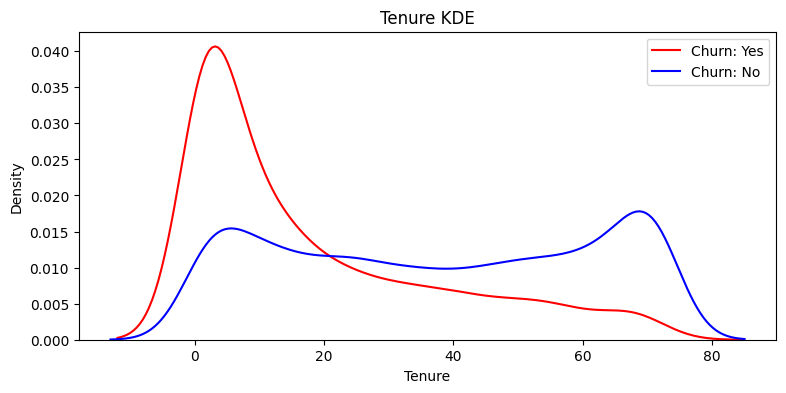

In [6]:
kdeplot('Tenure')

In [30]:
# Define the data and group labels
hist_data = [df[df['Churn'] == 'No']['Tenure'],
             df[df['Churn'] == 'Yes']['Tenure']]
group_labels = ['No', 'Yes']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False,show_rug=False)
fig.update_layout(title="Tenure KDE", width=600, height=400,xaxis_title="Tenure",yaxis_title="Density")

fig.show()

In [19]:
fig = px.histogram(df,x= 'MonthlyCharges',height=400, width = 600, title = "Histogram MonthlyCharges per Churn", nbins = 35, color='Churn', color_discrete_map = {'Yes': px.colors.qualitative.Plotly[4] , 'No': px.colors.qualitative.Set3[4]})
fig.show() 

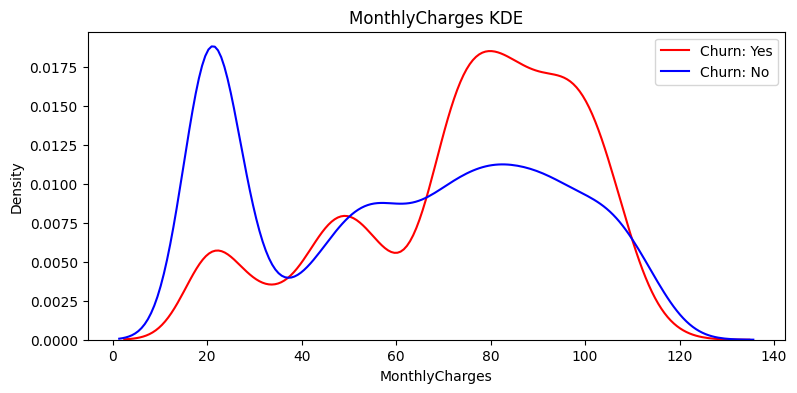

In [31]:
kdeplot('MonthlyCharges')

In [32]:
hist_data = [df[df['Churn'] == 'No']['MonthlyCharges'],
             df[df['Churn'] == 'Yes']['MonthlyCharges']]
group_labels = ['No', 'Yes']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False,show_rug=False)
fig.update_layout(title="MonthlyCharges KDE", width=600, height=400,xaxis_title="MonthlyCharges",yaxis_title="Density")
fig.show()

The correlation score between MonthlyCharges and Churn was very weak and positive, meaning that we could not say that increase of MonthlyCharges implies the binary outcome / that the probability of one of the binary values is increasing. However, by analyzing the KDE distribution, clients with highly monthly charges (70-100) are more likely to churn, comparing with clients that had lower monthlycharges and are less likely to churn.

In [33]:
fig = px.histogram(df,x= 'TotalCharges',height=400, width = 600, title = "Histogram TotalCharges per Churn", nbins = 35, color='Churn', color_discrete_map = {'Yes': px.colors.qualitative.Plotly[4] , 'No': px.colors.qualitative.Set3[4]})
fig.show() 

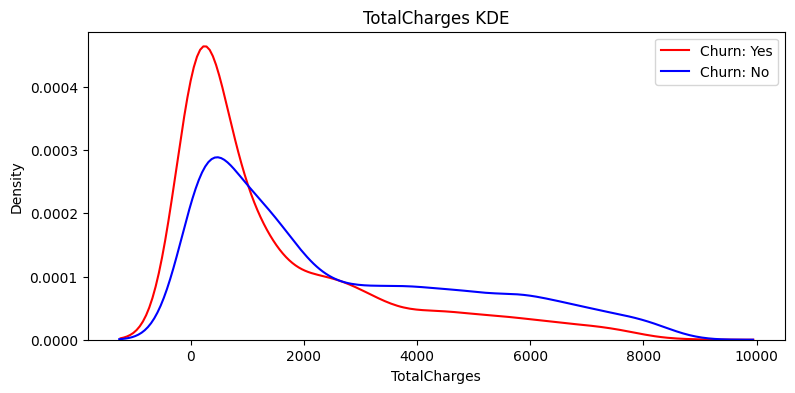

In [34]:
kdeplot('TotalCharges')

In [35]:
hist_data = [df[df['Churn'] == 'No']['TotalCharges'],
             df[df['Churn'] == 'Yes']['TotalCharges']]
group_labels = ['No', 'Yes']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False,show_rug=False)
fig.update_layout(title="TotalCharges KDE", width=600, height=400,xaxis_title="TotalCharges",yaxis_title="Density")
fig.show()

We could not depict any pattern from the KDE distribution.

In [40]:
mtm = df[df["Contract"]=="Month-to-month"]
oy = df[df["Contract"]=="One year"]
ty = df[df["Contract"]=="Two year"]

mtm_churn = mtm[mtm["Churn"]=="Yes"]
mtm_non_churn = mtm[mtm["Churn"]=="No"]

oy_churn = oy[oy["Churn"]=="Yes"]
oy_non_churn = oy[oy["Churn"]=="No"]

ty_churn = ty[ty["Churn"]=="Yes"]
ty_non_churn = ty[ty["Churn"]=="No"]

In [43]:
data = {'Class': ["Month-to-month","One year","Two year"],
        'Churn': [round(mtm_churn.shape[0]/mtm.shape[0]* 100),round(oy_churn.shape[0]/oy.shape[0]* 100),round(ty_churn.shape[0]/ty.shape[0]* 100)],
        'Non_Churn': [round(mtm_non_churn.shape[0]/mtm.shape[0]* 100),round(oy_non_churn.shape[0]/oy.shape[0]* 100),round(ty_non_churn .shape[0]/ty.shape[0]* 100)]
        }

df = pd.DataFrame(data)

fig = px.bar(df, x='Class', y=['Non_Churn','Churn'],
            barmode='group', height=380, width = 600, color_discrete_map={'Churn': 'lightskyblue','Non_Churn': 'steelblue' }, title=' Churn Relative Frequency per Contract')

fig.data[0].text = df['Non_Churn'].astype(str)
fig.data[0].textposition = 'auto'
fig.data[1].text = df['Churn'].astype(str)
fig.data[1].textposition = 'auto'

fig.update_traces(textfont_size=12, textposition="inside", texttemplate = '%{y:.0f}%')
fig.update_layout(yaxis_title = 'Churn',xaxis_title = 'Contract')

fig.show() 

##### 2.3.4.1 Multivariate Analysis

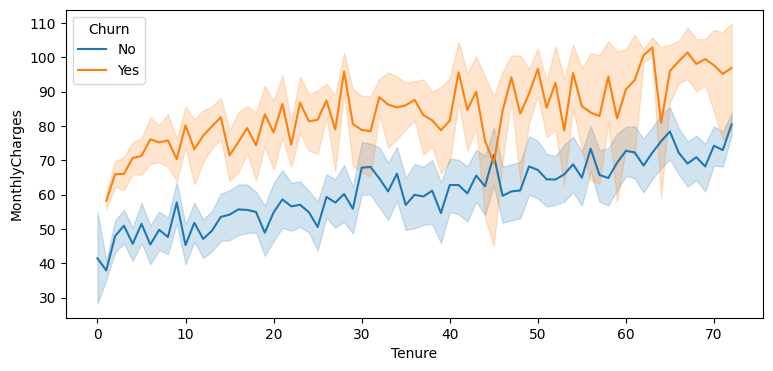

In [36]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=df, x="Tenure", y="MonthlyCharges", hue="Churn")
plt.show()
# Recent clients are more likely to churn / Old clients are less likely to churn
# Clients with highly monthly charges are more likely to churn, comparing with clients that had lower monthlycharges and are less likely to churn.

This line plot is showing the relationship between tenure (x-axis) and monthly charged (y-axis) for two groups: customers who churned and customers who did not churn. The plot indicates that as the tenure increases, the monthly charged also increases linearly for both groups. However, the line representing customers who churned is consistently above the line representing customers who did not churn.

This suggests that customers who churned are charged more than customers who did not churn, on average, for the same tenure. This could be due to several reasons, such as the customers who churned having a higher rate plan or using more services. It is important to understand the reason behind this difference in order to address it and reduce churn.